## Improving My Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

dataset = datasets.load_boston()

c:\Users\USER\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

**Improve by adding more features**

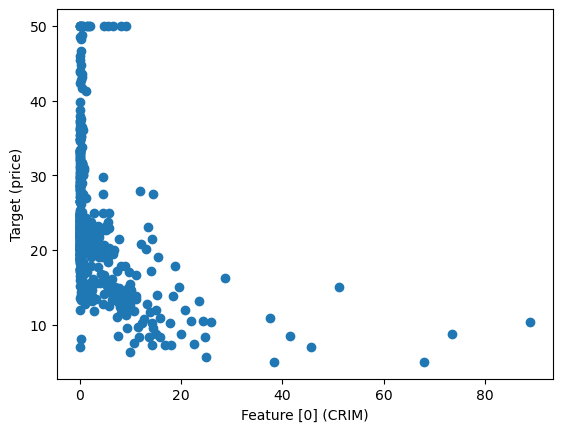

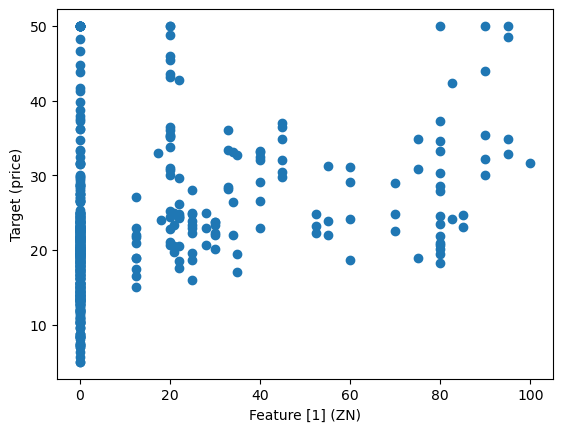

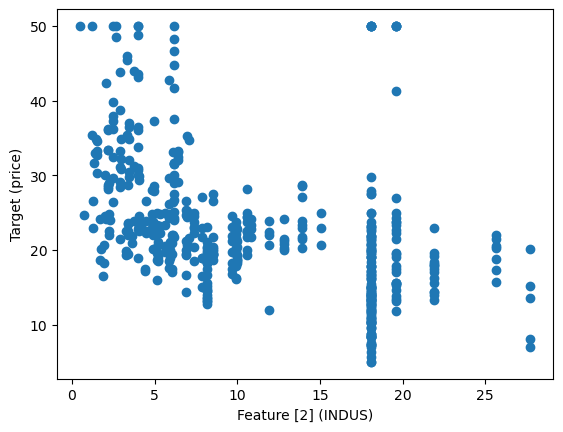

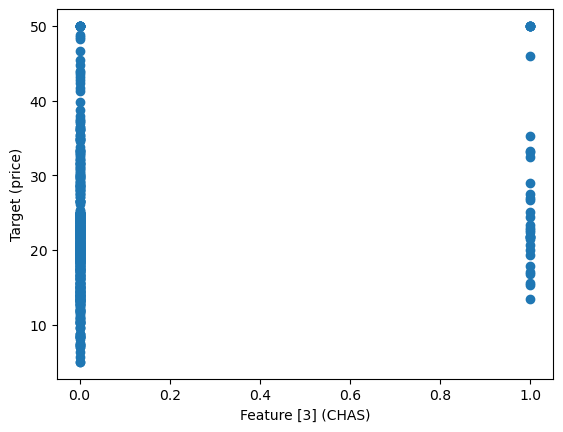

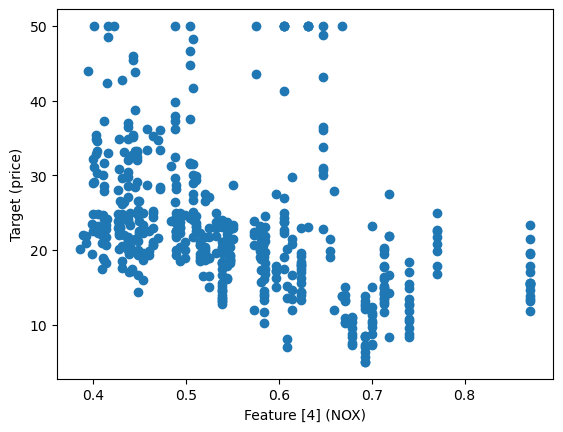

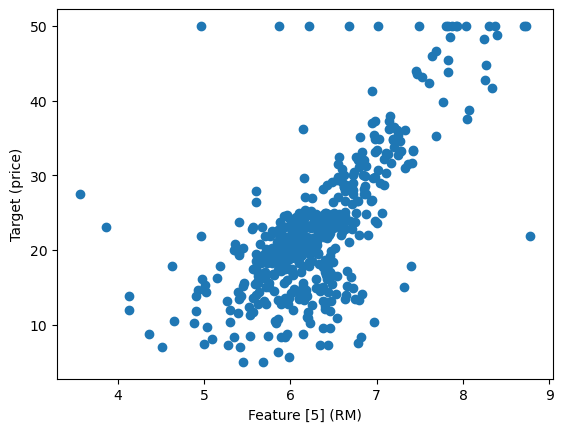

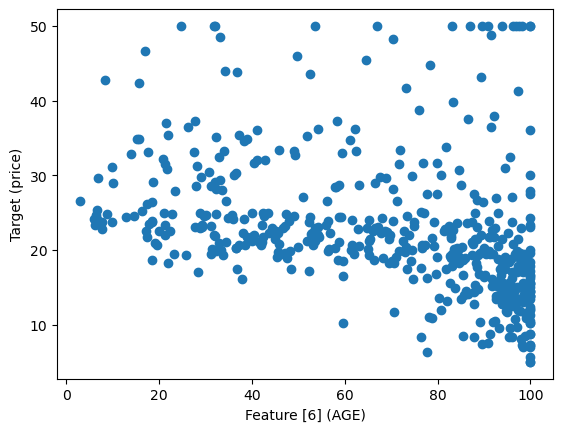

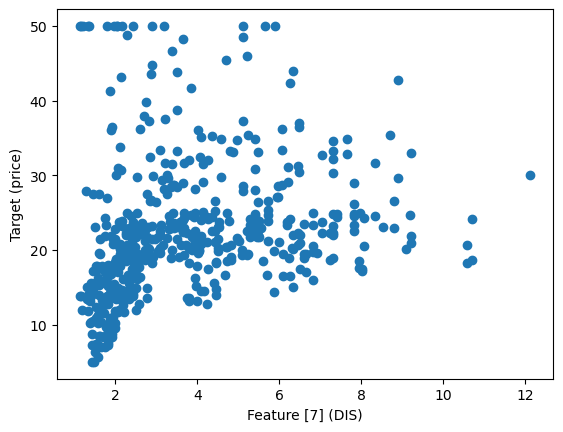

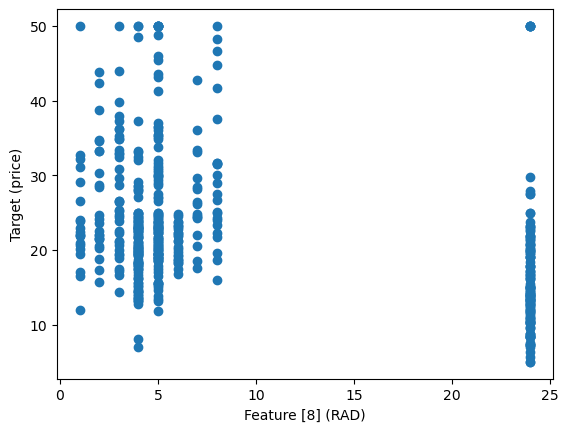

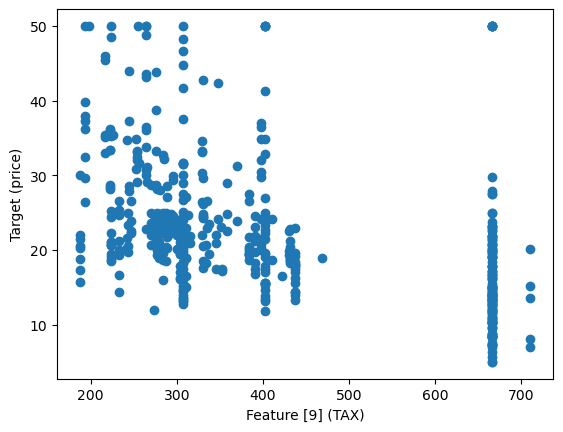

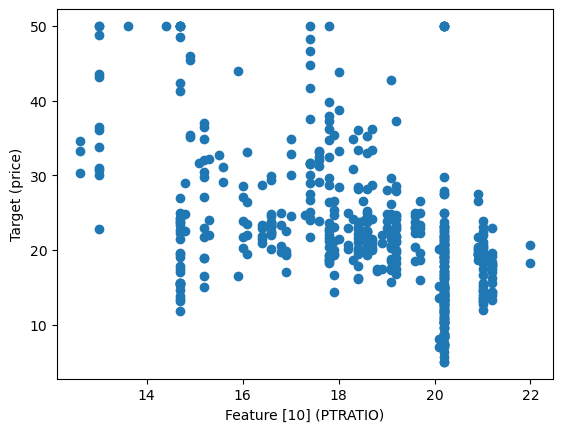

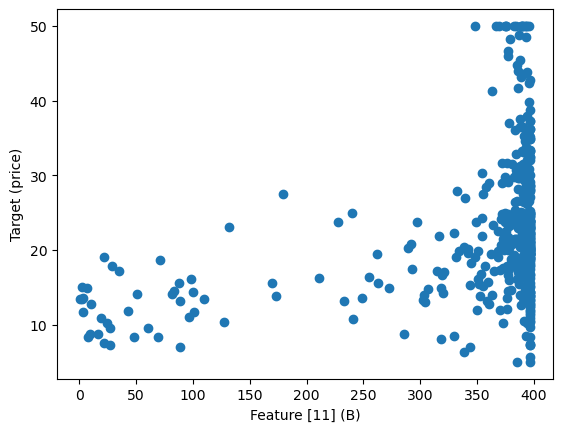

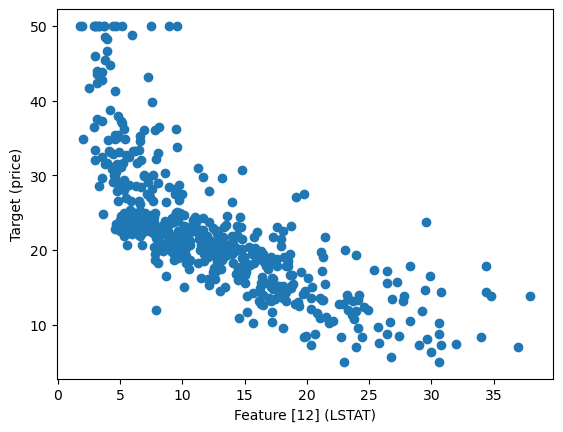

In [3]:
# Visualize the data
for i in range(dataset['data'].shape[1]):
    x = dataset['data'][:, [i]]
    y = dataset['target']
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_ylabel('Target (price)')
    ax.set_xlabel('Feature [' + str(i) + '] (' + dataset['feature_names'][i] + ')')

In [4]:
# LSTAT also seems to be a good attribute, so include it as another feature for the model

# Prepare the data
x = dataset['data'][:, [5, 12]]
y = dataset['target']

# Init a linear model
model_2features = linear_model.LinearRegression()
# Train the model
model_2features.fit(x, y)

LinearRegression()

In [ ]:
# coef of RM is positive while LSTAT is negative
# which means that when RM increase Price increase, but if LSTAT increase Price decrease
# coef(weight) of RM is bigger than LSTAT
# which means that RM have more impact on Price than LSTAT
print('Price =', model_2features.coef_[0], '* RM +', model_2features.coef_[1], '* LSTAT +', model_2features.intercept_)

Price = 5.094787984336545 * RM + -0.6423583342441295 * LSTAT + -1.358272811874489


In [ ]:
# Make a prediction
rm = 7
lstat = 2
print(model_2features.predict([[rm, lstat]])) # reminder! 2d array 

[33.02052641]


**Try using all features**

In [11]:
x = dataset['data']

model_allfeatures = linear_model.LinearRegression()
model_allfeatures.fit(x,y)

for i, coef in enumerate(model_allfeatures.coef_):
    print('Weights(' + dataset['feature_names'][i] + '):', coef)

Weights(CRIM): -0.1080113578367967
Weights(ZN): 0.04642045836687873
Weights(INDUS): 0.02055862636706545
Weights(CHAS): 2.6867338193448664
Weights(NOX): -17.76661122829996
Weights(RM): 3.8098652068092402
Weights(AGE): 0.0006922246403434328
Weights(DIS): -1.4755668456002569
Weights(RAD): 0.3060494789851718
Weights(TAX): -0.01233459391657441
Weights(PTRATIO): -0.9527472317072911
Weights(B): 0.009311683273793355
Weights(LSTAT): -0.5247583778554891


**Improve model by transforming feature(s)**

In [14]:
# Import library for data transformation
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# Prepare the data
y = dataset['target']
x = dataset['data'][:, [5]]

In [16]:
poly2 = PolynomialFeatures(degree=2, include_bias=False) # degree=2 => x**2 + x

In [17]:
x_poly2 = poly2.fit_transform(x)

In [ ]:
x_poly2 # get 1st feature being RM and 2nd feature being RM**2

array([[ 6.575   , 43.230625],
       [ 6.421   , 41.229241],
       [ 7.185   , 51.624225],
       ...,
       [ 6.976   , 48.664576],
       [ 6.794   , 46.158436],
       [ 6.03    , 36.3609  ]])

In [19]:
# Init a linear model
model_poly2 = linear_model.LinearRegression()
# Train the model
model_poly2.fit(x_poly2, y)

LinearRegression()

Text(0, 0.5, 'Price')

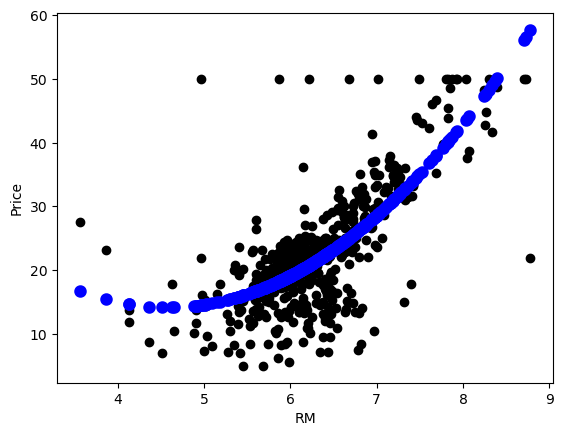

In [21]:
# Visualize the output
plt.scatter(x, y, color='black')
plt.scatter(x, model_poly2.predict(x_poly2), color='blue', linewidth=3)
plt.xlabel('RM')
plt.ylabel('Price')

In [ ]:
print(model_poly2.coef_, model_poly2.intercept_)
# so -22.6x + 2.47x**2 + 66

[-22.64326237   2.47012384] 66.05884748479396


In [23]:
# Make a prediction
new_x = [[7]]
new_x_transformed = poly2.transform(new_x) # can you transfrom and not fit because it still remember fitting
model_poly2.predict(new_x_transformed)

array([28.59207922])

In [25]:
print(model_poly2.coef_[1], '* RM**2 +', model_poly2.coef_[0], '* RM +', model_poly2.intercept_)
print(model_poly2.coef_[0] * 7 + model_poly2.coef_[1] * (7**2) + model_poly2.intercept_)

2.470123844033255 * RM**2 + -22.64326237424357 * RM + 66.05884748479396
28.592079222718453


**Now with LSTAT**

In [31]:
x = dataset['data'][:, [5, 12]]

poly2 = PolynomialFeatures(degree=2, include_bias=False)
x_poly2 = poly2.fit_transform(x)
x_poly2

array([[ 6.575   ,  4.98    , 43.230625, 32.7435  , 24.8004  ],
       [ 6.421   ,  9.14    , 41.229241, 58.68794 , 83.5396  ],
       [ 7.185   ,  4.03    , 51.624225, 28.95555 , 16.2409  ],
       ...,
       [ 6.976   ,  5.64    , 48.664576, 39.34464 , 31.8096  ],
       [ 6.794   ,  6.48    , 46.158436, 44.02512 , 41.9904  ],
       [ 6.03    ,  7.88    , 36.3609  , 47.5164  , 62.0944  ]])

In [32]:
model_2poly2 = linear_model.LinearRegression()
model_2poly2.fit(x_poly2, y)

LinearRegression()

In [33]:
# Make a prediction
new_x = [[7, 2]]
new_x_transformed = poly2.transform(new_x) # can you transfrom and not fit because it still remember fitting
print(model_2poly2.predict(new_x_transformed)) # reminder! 2d array 

[35.71154103]
